In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ticker_code = "IBM"

df = yf.download(ticker_code, start='2025-01-01', end='2025-06-13', group_by='ticker')
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(1)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100
2025-01-06,220.059766,221.391973,217.839432,219.734116,2846700
2025-01-07,220.405183,223.720883,219.892035,221.007141,3299300
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800


In [6]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Close'])

print("ADF TEST RESULTS:")
print(adf_test)

ADF TEST RESULTS:
(-1.5061127445246913, 0.5304853134293476, 0, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}, 605.8878516839918)


In [7]:
col = df["Close"].diff().dropna()
adf_test = adfuller(col)

print("ADF TEST RESULTS:")
print(adf_test)

ADF TEST RESULTS:
(-10.916397417441885, 1.0648318802325212e-19, 0, 109, {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}, 603.7631342789941)


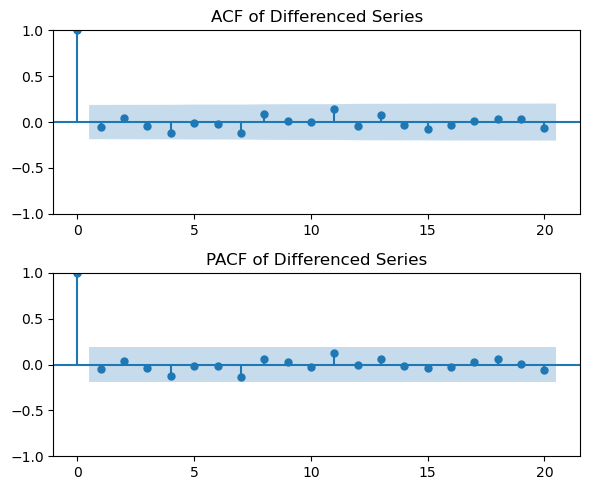

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(6, 5))
plot_acf(col, ax=axes[0], lags=20)
axes[0].set_title("ACF of Differenced Series")

plot_pacf(col, ax=axes[1], lags=20)
axes[1].set_title("PACF of Differenced Series")

plt.tight_layout()
plt.show()


In [18]:
from pmdarima.arima import auto_arima

auto_model = auto_arima(df['Close'], seasonal=False, stepwise=True, trace=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=678.585, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=680.275, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=680.297, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=677.957, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=682.165, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.167 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -337.978
Date:                Mon, 16 Jun 2025   AIC                            677.957
Time:                        13:49:28   BIC                            680.657
Sample:                             0   HQIC                           679.052
                    

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=678.585, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=680.275, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=680.297, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=677.957, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=682.165, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.421 seconds


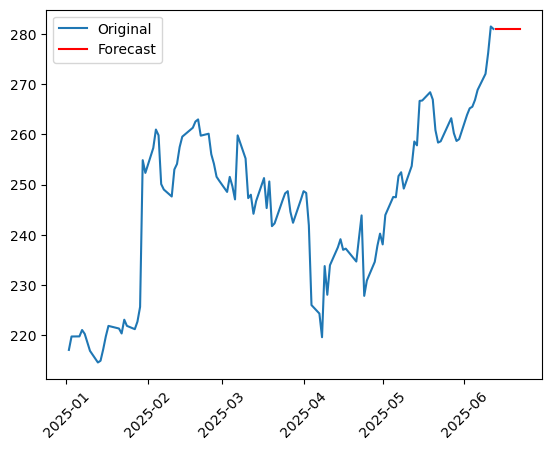

In [19]:
from pmdarima.arima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

# Train the model on your time series
model = auto_arima(df['Close'], seasonal=False, stepwise=True, trace=True)

# Forecast the next 10 future values
n_periods = 10
forecast = model.predict(n_periods=n_periods)

# Create future index (optional)
future_index = pd.date_range(start=df.index[-1], periods=n_periods+1, freq='D')[1:]

# Plot
plt.plot(df.index, df['Close'], label='Original')
plt.plot(future_index, forecast, label='Forecast', color='red')
plt.legend()
plt.xticks(rotation=45)
plt.show()
